In [95]:
# Import
import pandas as pd
from scipy.stats import zscore
%matplotlib inline

In [59]:
crime = pd.read_csv('data/train.csv')
hprice = pd.read_csv('data/fredgraph.csv')

In [60]:
# remove day from hprice
hprice['Dates'] = pd.to_datetime(hprice.observation_date)
hprice['month'] = hprice.Dates.map(lambda x: x.strftime('%Y-%m'))

In [61]:
hprice.dtypes

observation_date            object
SFXRSA                     float64
Dates               datetime64[ns]
month                       object
dtype: object

In [62]:
# Convert to date
crime.Dates = pd.to_datetime(crime.Dates)
crime['month'] = crime.Dates.map(lambda x: x.strftime('%Y-%m'))

In [73]:
# Get a count by month
crimecount = crime.groupby('month', as_index=False).count()
crimecount.dtypes

month         object
Dates          int64
Category       int64
Descript       int64
DayOfWeek      int64
PdDistrict     int64
Resolution     int64
Address        int64
X              int64
Y              int64
dtype: object

In [84]:
hprice.month[192] == crimecount.month[0]

True

In [99]:
# Join housing prices with crime
jdat = pd.merge(crimecount, hprice, on="month", how="inner")
jdat['crime'] = zscore(jdat.DayOfWeek)
jdat['hprice'] = zscore(jdat.SFXRSA)
jdat.drop(jdat.tail(1).index, inplace=True)
jdat.tail()

,month,Dates_x,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,observation_date,SFXRSA,Dates_y,crime,hprice
143,2014-12,5391,5391,5391,5391,5391,5391,5391,5391,5391,2014-12-01,199.83,2014-12-01,-0.718096,0.997128
144,2015-01,5866,5866,5866,5866,5866,5866,5866,5866,5866,2015-01-01,201.18,2015-01-01,-0.038550,1.039652
145,2015-02,6008,6008,6008,6008,6008,6008,6008,6008,6008,2015-02-01,207.64,2015-02-01,0.164599,1.243133
146,2015-03,6851,6851,6851,6851,6851,6851,6851,6851,6851,2015-03-01,211.53,2015-03-01,1.370614,1.365662
147,2015-04,6609,6609,6609,6609,6609,6609,6609,6609,6609,2015-04-01,211.05,2015-04-01,1.024403,1.350543


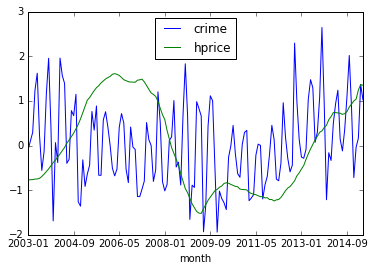

In [100]:
# Plot Count by price
jdat.plot(x="month", y=["crime", "hprice"])

Crime probs is not related to housing prices. need to breakdown by neighborhood or something else.